# Dataset and Question
---
Dataset: https://www.kaggle.com/benroshan/online-food-delivery-preferencesbangalore-region

With so many restaurants in Singapore, having the edge to attract more customers is lucrative.  
One way a restaurant can naturally attract more customers is through **reviews** from the customers.  
The plethora of online food delivery services act as a review bank for the many restaurants, hence, a good place to start exploring.  
We want to find out, if we were ever to setup our own restaurant, what would make customers come back and order again.  

>**What are the optimal factors for a restaurant to attract consumers via food delivery service?**

Our dataset is set in a metropolitan city in India, Bangalore.  
Due to the recent (2021) rise in demand of online delivery there, this dataset was gathered.

# Essential Libraries
---
    > NumPy : Library for Numeric Computations in Python
    > Pandas : Library for Data Acquisition and Preparation
    > Matplotlib : Low-level library for Data Visualization
    > Seaborn : Higher-level library for Data Visualization
    > Scikit Learn : Regressions and Classification

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb

In [2]:
foodDelivery = pd.read_csv("onlinedeliverydata.csv")

# EDA
---


## Dataset Analysis
---

There are a lot of Categorical variables compared to Numerical variables, as seen from the many objects in the dataset info.

In [5]:
foodDelivery.head(None)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [6]:
foodDelivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [9]:
foodDelivery.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

## Preliminary Data Cleaning
---
Here, we check for any missing values.


In [12]:
foodDelivery.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

## Univariate Analysis
---

#### For our dataset, since there are 55 variables, we have broken down the dataset into a few smaller categories:
- Consumer Demographics:
    - Basic Information:
        - Age
        - Gender
    - Family:
        - Marital Status
        - Occupation
        - Monthly Income
        - Educational Qualifications
        - Family size
    - Residence:
        - Latitude
        - Longitude
        - Pin code
    - Delivery Preferences:
        - Medium of order (Preference 1)
        - Medium of order (Preference 2)
        - Meal-of-the-day of order (Preference 1)
        - Meal-of-the-day of order (Preference 2)
        - General Type of Food (Preference 1)
        - General Type of Food (Preference 2)
        - Order Time (Time of day to order)
        - Maximum Wait Time (Before cancelling the order)


- Location
    - Residence in busy location
    - Google Maps Accuracy
    - Good Road Condition  
    

- Customer Survey Results:
    - Ease and Convenience
    - Saves Time
    - More restaurant choices available
    - Ease of Payment Option
    - More Offers and Discount 
    - Good Food Quality 
    - Good Tracking System 
    - Self-cooking
    - Health concern
    - Late Delivery
    - Poor Hygiene
    - Bad Past experiences
    - Unavailability 
    - Unaffordability
    - Long delivery time
    - Delay of delivery person getting assigned
    - Delay of delivery person picking up food
    - Delivery person ability
    - Low quantity low time (Quantity of food affects delivery time)
    - Wrong order delivered
    - Missing item
    - Order placed by mistake
    - Influence of Time (Order affects delivery time)
    - Influence of rating (Current restuarant rating affects order)
    - **Output** (Will I purchase again?)
    - Reviews


- Important factors of Delivery
    - Less Delivery Time
    - High Quality of Package
    - Number of calls
    - Politeness
    - Freshness
    - Temperature
    - Good Taste
    - Good Quantity

### Consumer Demographics - Basic Information
---
From the Countplots of Age and Gender,
- Concentration of people between the ages between 22-25
- About 50 more males than females  

We can conclude that,
- Data came from mostly university students
- Not much disparity in gender representation

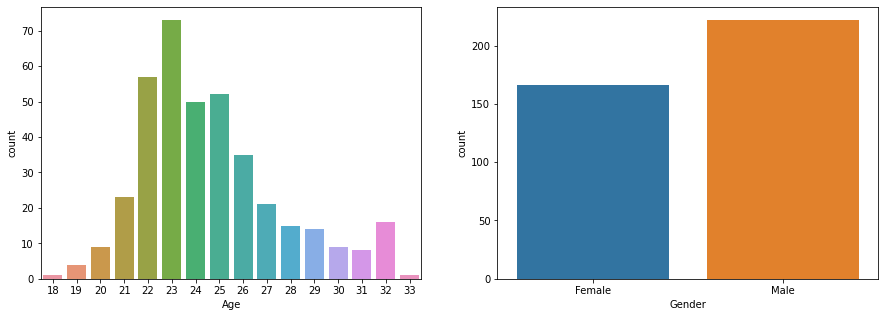

In [24]:
age = pd.DataFrame(foodDelivery['Age'])
gender = pd.DataFrame(foodDelivery['Gender'])

f, axes = plt.subplots(1, 2, figsize = (15, 5))
f = sb.countplot(x = "Age", data = foodDelivery, ax = axes[0], orient = "h")
f = sb.countplot(x = "Gender", data = foodDelivery, ax = axes[1], orient = "h")

### Consumer Demographics - Family 
---
We chose to remove Marital Status 
From the Countplots of Marital Status, Occupation, Monthly Income, Educational, Qualifications, and Family size,